<a href="https://colab.research.google.com/github/ehsankarami1358/ehsan/blob/main/TSNE_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [46]:
from sklearn.datasets import fetch_openml

# Download MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)



In [47]:
X, y = mnist.data, mnist.target

In [63]:
df=pd.DataFrame(data=X,columns=mnist.feature_names)
df['target']=y
df.head(20)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [49]:
# Extract images and labels


In [50]:
df.shape

(70000, 785)

In [51]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
y=df['target']
X=df.drop('target',axis=1).to_numpy()


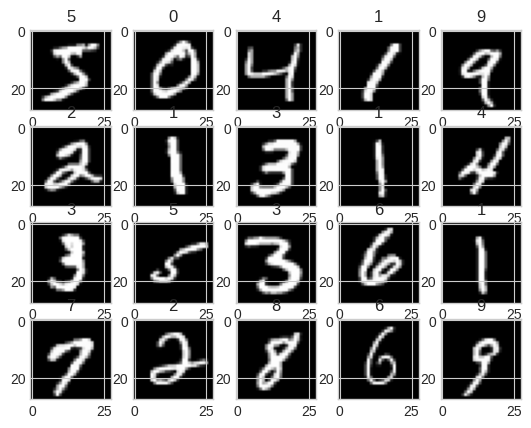

In [67]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X[i,:].reshape(28,28),cmap='gray')
  plt.title(y[i])


In [54]:
#Normalize data
from sklearn.preprocessing import RobustScaler
std=RobustScaler()

X_std=std.fit_transform(X)


In [55]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_std[:2000])

In [56]:
tsne=TSNE(n_components=2)
X_tsne=tsne.fit_transform(X_std[:2000])

In [57]:
!pip install umap-learn

In [58]:
from umap import UMAP
umap=UMAP(n_components=2)
X_umap=umap.fit_transform(X_std[:2000])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [59]:
label_2000=y[:2000]
tsne_data=np.column_stack((X_tsne,label_2000))

In [60]:
label_2000=label_2000.astype(int)

<ipython-input-61-68a3e8a5dc44>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c_map=plt.cm.get_cmap('jet',10)


Text(0.5, 1.0, 't-SNE')

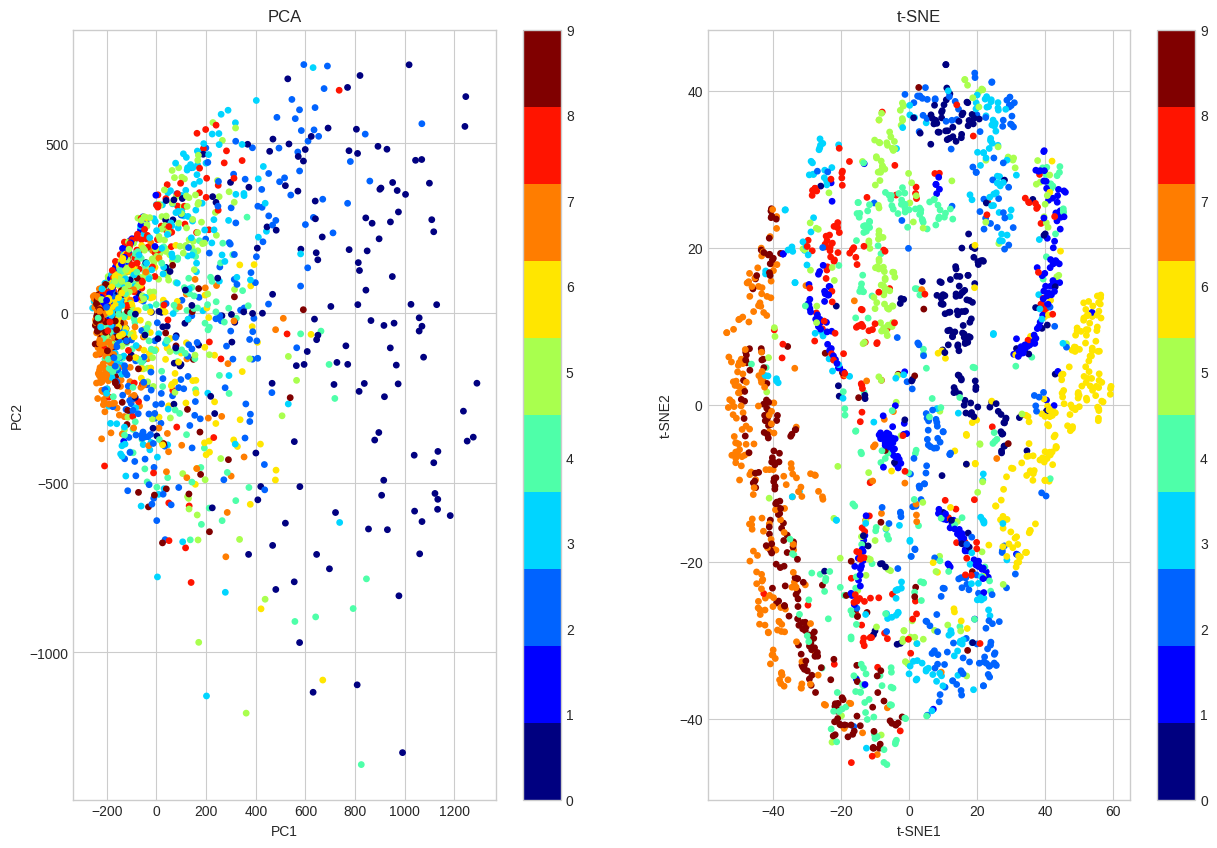

In [61]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 10))
c_map=plt.cm.get_cmap('jet',10)

#PCA
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0],X_pca[:,1],c=label_2000,cmap=c_map,s=15)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')

#TNSE
plt.subplot(1,2,2)
plt.scatter(tsne_data[:,0],tsne_data[:,1],c=label_2000,cmap=c_map,s=15)
plt.colorbar()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE')

Text(0.5, 1.0, 'umap')

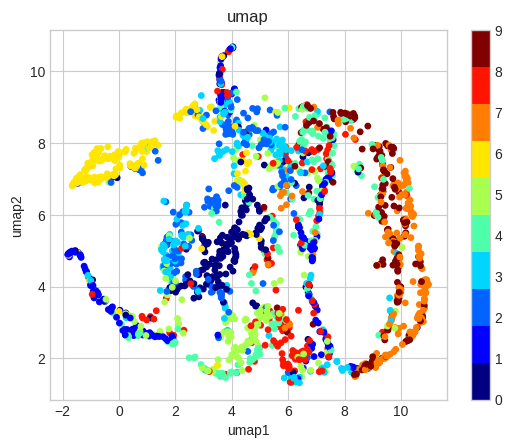

In [62]:
#UMAP
plt.scatter(X_umap[:,0],X_umap[:,1],c=label_2000,cmap=c_map,s=15)
plt.colorbar()
plt.xlabel('umap1')
plt.ylabel('umap2')
plt.title('umap')